<a href="https://colab.research.google.com/github/SantiagoFra/Twitch-Analytics/blob/main/twitch_analysis_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS
This analysis was done in order to better understand the features and performance of Twitch channels, especially those that broadcast in Spanish. The dataset used is the following: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

It is a dataset that contains the data of the top 1000 Twitch streamers with different characteristics.

This analysis was done by: Fragola Santiago


# QUESTIONS
This analysis will attempt to answer the following questions:
1. What is the distribution of languages ​​​​in the channels? <br>
2. What is the distribution of mature content (Mature) on Spanish channels? <br>
3. What is the distribution of channels associated with the Twitch Partner program? <br>
4. Is there any correlation between the numerical variables?
5. What are the Spanish channels with the highest peak views? <br>
6. What are the Spanish channels with the most followers?

In [23]:
# I import the libraries that will be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('twitch.csv')

In [25]:
# I get basic information from the dataset

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
None
       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160

What I am going to do is review, thanks to the whisker graphs, all the field values ​​to find outliers. <br>
It is important to get rid of this type of data, because it can generate misleading conclusions at the end of an analysis.

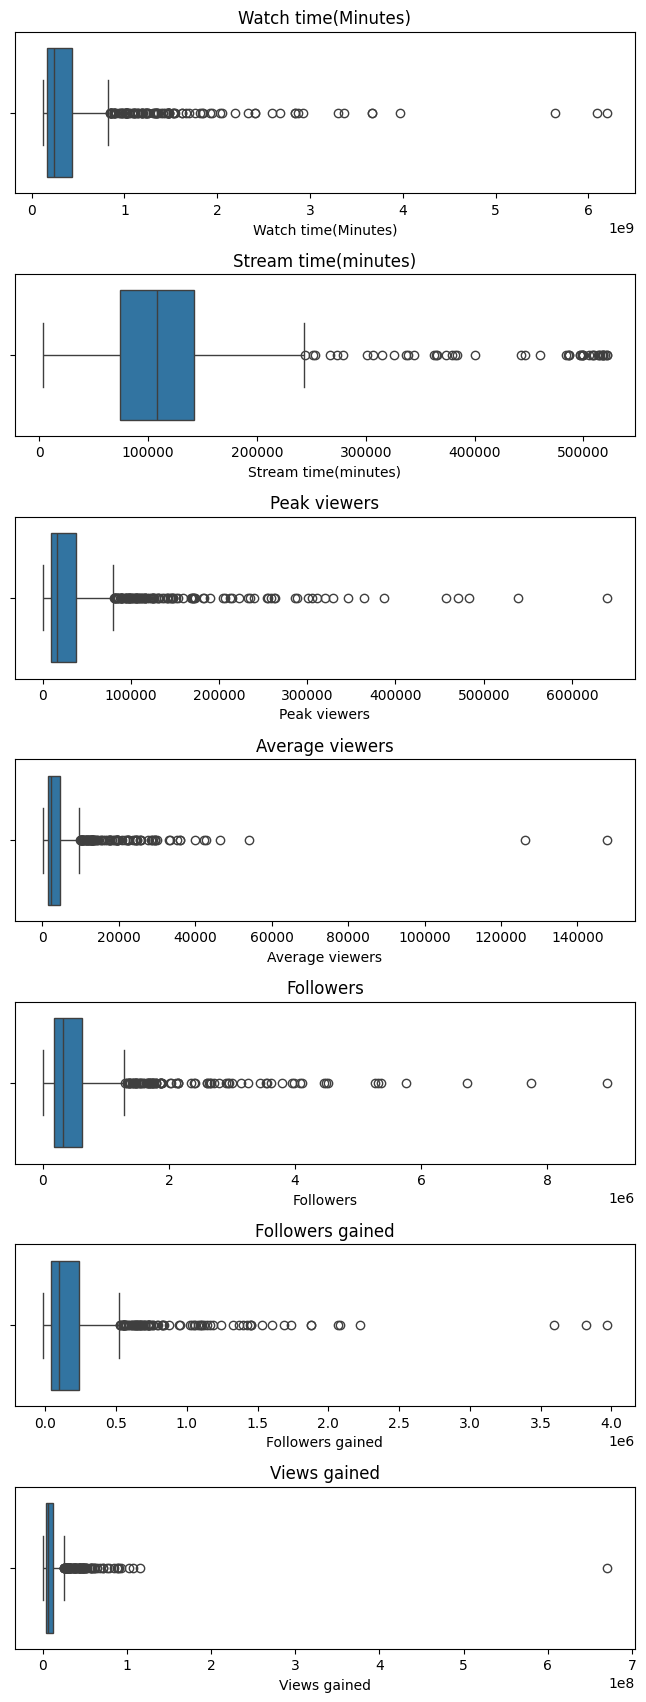

In [26]:
# Select all numeric columns
cols_num = df.select_dtypes(include='int64').columns

# I make the mustache graphics for each of them
fig, axes = plt.subplots(nrows=len(cols_num), figsize=(8, len(cols_num)*3))
fig.subplots_adjust(hspace=0.5)

for col, ax in zip(cols_num, axes):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

Followers gained, Views Gained, Average viewers and Watch time(minutes) present outlier values ​​that are very far from the average. Therefore I will take it into account when carrying out the corresponding cleaning.

I am also going to check the object and boolean variables to verify that all their values ​​are correct.

In [27]:
cols_cat = ['Partnered','Mature','Language']
for i, col in enumerate(cols_cat):
  print(df[col].unique())

[ True False]
[False  True]
['English' 'Portuguese' 'Spanish' 'German' 'Korean' 'French' 'Russian'
 'Japanese' 'Chinese' 'Czech' 'Turkish' 'Italian' 'Polish' 'Thai' 'Arabic'
 'Slovak' 'Other' 'Hungarian' 'Greek' 'Finnish' 'Swedish']


Since I did not find any unusual values ​​in the columns of cols_cat, I proceed to eliminate the outliers of the numerical variables.

In [28]:
print(f'Number of rows before cleaning: {df.shape[0]}')
df = df[df['Followers gained'] >= 0]
print(f'Number of rows after cleaning: {df.shape[0]}')

Number of rows before cleaning: 1000
Number of rows after cleaning: 997


In [29]:
print(f'Number of rows before cleaning: {df.shape[0]}')
df = df[df['Views gained'] < 600000000]
print(f'Number of rows after cleaning: {df.shape[0]}')

Number of rows before cleaning: 997
Number of rows after cleaning: 996


In [30]:
print(f'Number of rows before cleaning: {df.shape[0]}')
df = df[df['Average viewers'] < 100000]
print(f'Number of rows after cleaning: {df.shape[0]}')

Number of rows before cleaning: 996
Number of rows after cleaning: 994


In [31]:
print(f'Number of rows before cleaning: {df.shape[0]}')
df = df[df['Watch time(Minutes)'] < 5000000000]
print(f'Number of rows after cleaning: {df.shape[0]}')

Number of rows before cleaning: 994
Number of rows after cleaning: 991


Once the data cleaning is finished, I proceed to do an analysis that answers the questions asked at the beginning.

What is the distribution of languages ​​​​in the channels?

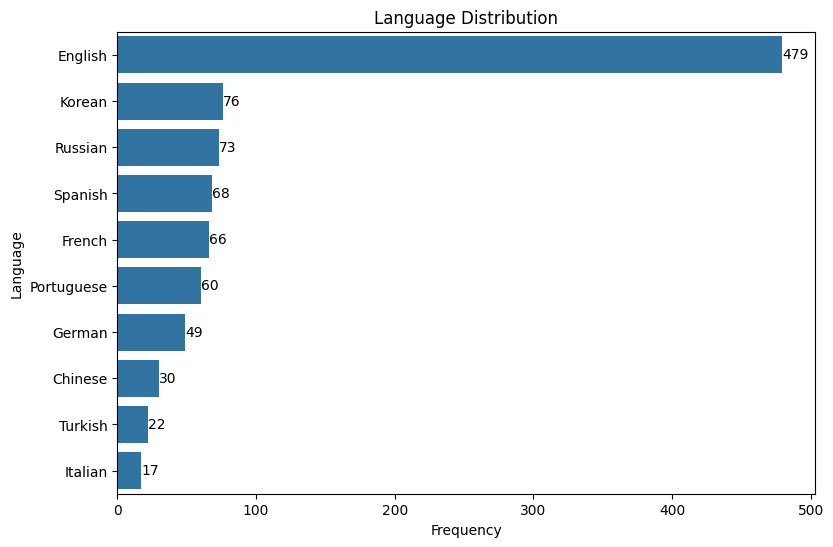

In [32]:
language_count = df['Language'].value_counts().nlargest(10) #I save the 10 most spoken languages ​​in a variable

# Creating the bar chart
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=language_count.values, y=language_count.index)
for i, value in enumerate(language_count.values):
    ax.text(value + 0.1, i, str(value), va='center')
plt.title('Language Distribution')
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.show()

Now that I know the distribution of languages, I proceed to make a filter with those channels that have Spanish as their language since this analysis focuses on these streamers.

In [33]:
#I'm left only with the Spanish channels
df_spanish = df[df['Language'] == 'Spanish']
print(df_spanish.shape)

(68, 11)


In [34]:
# The first 5 rows of this dataset
df_spanish.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish
43,ibai,1412913285,57795,173238,22837,1894953,1602088,44178173,True,False,Spanish
69,LVPes,1115650275,90960,233009,12947,587677,158934,51523747,True,False,Spanish


What is the distribution of mature content (Mature) on Spanish channels?

Mature
False    57
True     11
Name: count, dtype: int64


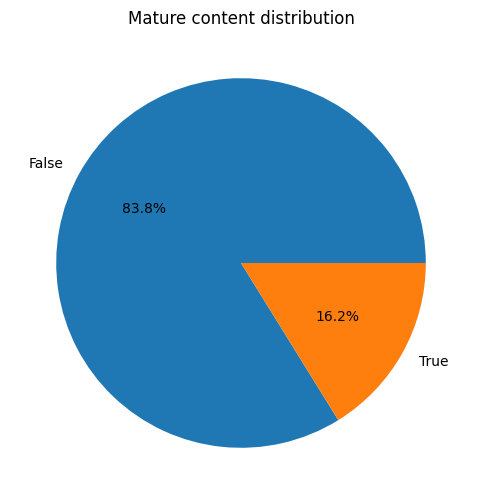

In [35]:
# I save the number of channels according to their content in a variable
mature_counts = df_spanish['Mature'].value_counts()
print(mature_counts)

# I make a pie chart
plt.figure(figsize=(6, 6))
plt.pie(mature_counts, labels=mature_counts.index, autopct='%1.1f%%')
plt.title('Mature content distribution')
plt.show()

In [36]:
# I show channels with mature content
df_spanish[df_spanish['Mature'] == True]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
171,Reborn_Live,578122875,32100,57849,17488,697007,682512,9965787,True,True,Spanish
568,ElcanaldeJoaco,208060515,20445,48072,8673,810622,758797,4893535,True,True,Spanish
606,Peereira7,198252765,133800,14532,1377,377689,361206,6222094,True,True,Spanish
623,zEkO,193867860,44970,21313,4440,743040,370683,5338943,True,True,Spanish
624,x6FlipiN,193573740,61095,19304,2712,279204,186655,6462906,True,True,Spanish
711,Pimpeano,170116395,21420,38592,6469,740343,665323,3744461,True,True,Spanish
752,goncho,162817050,61770,18091,2431,442412,236558,6156791,True,True,Spanish
810,natalan,152469705,60510,9561,2240,529357,462674,2737155,True,True,Spanish
821,Frankkaster,150181140,30975,49127,4886,826222,356711,5878239,True,True,Spanish
826,RobertoCein,149162865,114120,15249,1270,730326,422842,2907888,True,True,Spanish


What is the distribution of channels associated with the Twitch Partner program?

Partnered
True     67
False     1
Name: count, dtype: int64


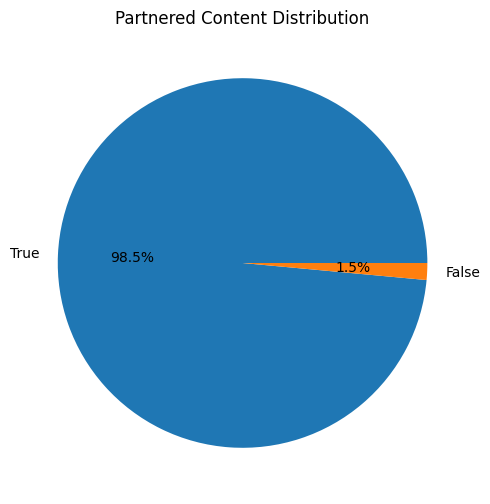

In [37]:
# Store in a variable the number of channels based on whether they are partnered
partnered_counts = df_spanish['Partnered'].value_counts()
print(partnered_counts)

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(partnered_counts, labels=partnered_counts.index, autopct='%1.1f%%')
plt.title('Partnered Content Distribution')
plt.show()

In [38]:
# I show in a table the channels that DO NOT have a partner (in this case it is only one channel)
df_spanish[df_spanish['Partnered'] == False]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
452,Ampeterby7,254852265,27480,43882,9301,1194476,1185647,6513197,False,False,Spanish



Is there any correlation between the numerical variables?

To answer this question, I used scatter plots to see at a glance if I could find a relationship between some variables.

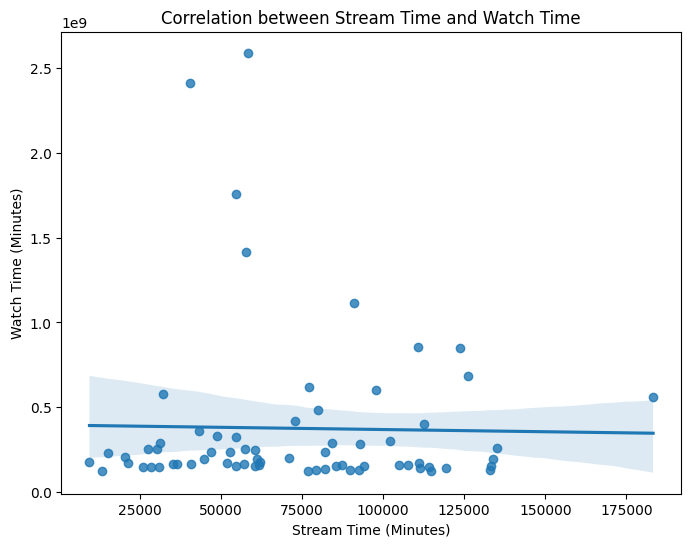

In [39]:
# Scatter plot between stream time and watch time.

plt.figure(figsize=(8,6))
sns.regplot(x='Stream time(minutes)', y='Watch time(Minutes)', data=df_spanish)
plt.title('Correlation between Stream Time and Watch Time')
plt.xlabel('Stream Time (Minutes)')
plt.ylabel('Watch Time (Minutes)')
plt.show()

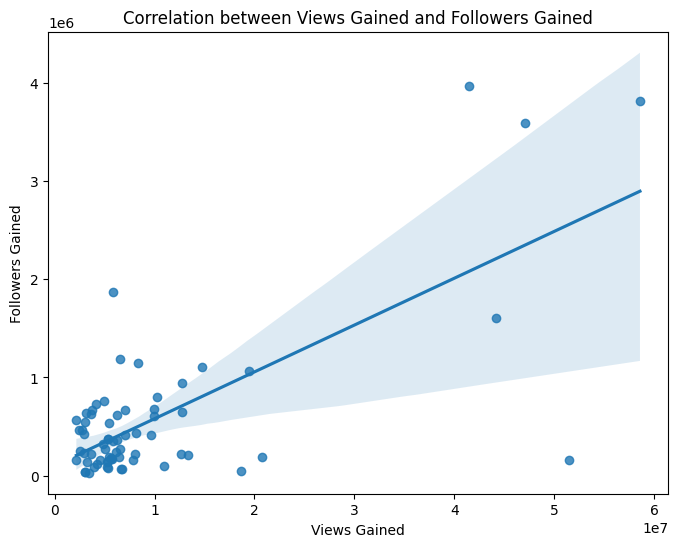

In [40]:
# Scatter plot between views gained and followers gained

plt.figure(figsize=(8,6))
sns.regplot(x='Views gained', y='Followers gained', data=df_spanish)
plt.title('Correlation between Views Gained and Followers Gained')
plt.xlabel('Views Gained')
plt.ylabel('Followers Gained')
plt.show()

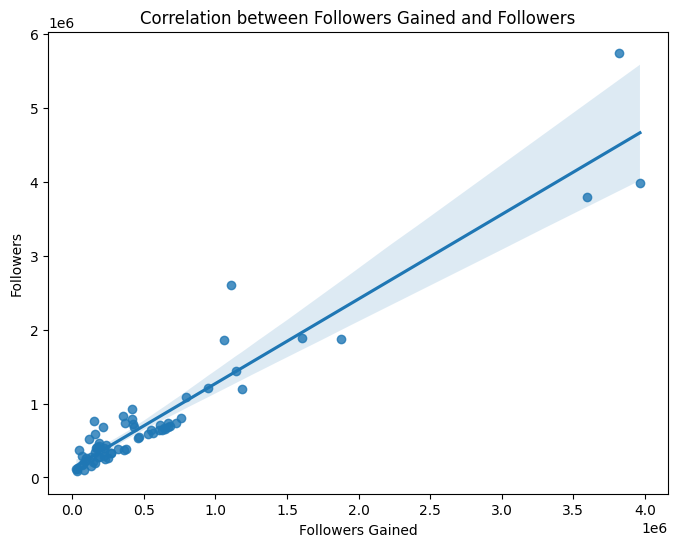

In [41]:
# Scatter plot between followers gained and channel followers

plt.figure(figsize=(8,6))
sns.regplot(x='Followers gained', y='Followers', data=df_spanish)
plt.title('Correlation between Followers Gained and Followers')
plt.xlabel('Followers Gained')
plt.ylabel('Followers')
plt.show()

What are the Spanish channels with the highest peak views?

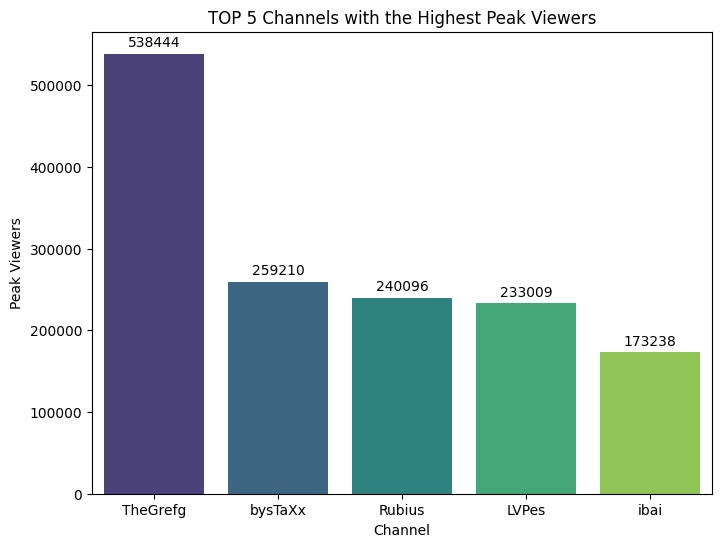

In [42]:
# Store in a variable the top 5 channels with the highest peak viewers
top5 = df_spanish.nlargest(5, 'Peak viewers')

# Create a bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Channel', y='Peak viewers', data=top5, hue='Channel', palette='viridis', legend=False)
for i, value in enumerate(top5['Peak viewers']):
    ax.text(i, value + 5000, str(value), ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Channel')
plt.ylabel('Peak Viewers')
plt.title('TOP 5 Channels with the Highest Peak Viewers')
plt.show()

What are the Spanish channels with the most followers?

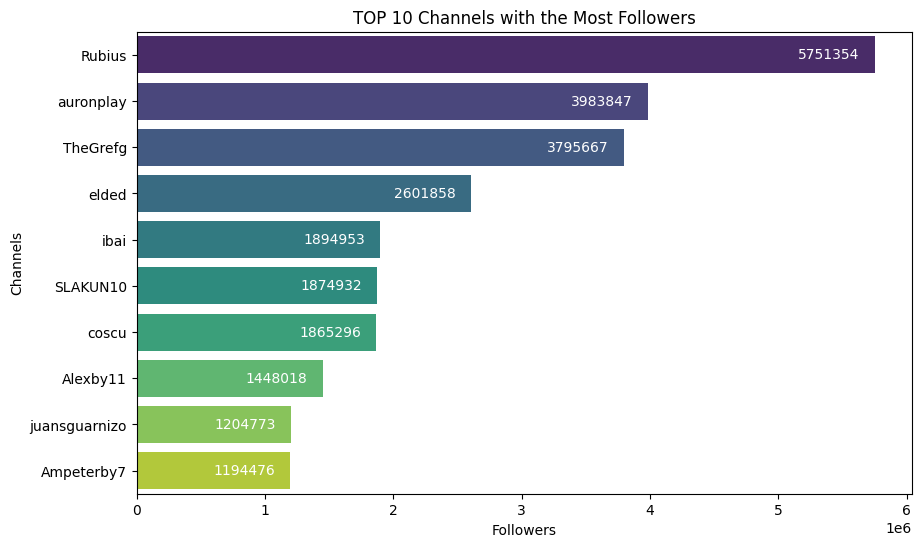

In [43]:
# Store in a variable the top 10 channels with the most followers
top10 = df_spanish.nlargest(10, 'Followers')

# Create a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Followers', y='Channel', data=top10, hue='Channel', palette='viridis', legend=False)
for i, value in enumerate(top10['Followers']):
    ax.text(value - 0.6e6, i, str(value), va='center', color='white')
plt.xlabel('Followers')
plt.ylabel('Channels')
plt.title('TOP 10 Channels with the Most Followers')
plt.show()

What are the channels with the most transmission time (Stream time)?

In this case I wanted to show two graphs instead of one. The one on the left presents the 10 channels with the most minutes of streaming, and on the right the same channels but presenting the minutes watched by viewers.

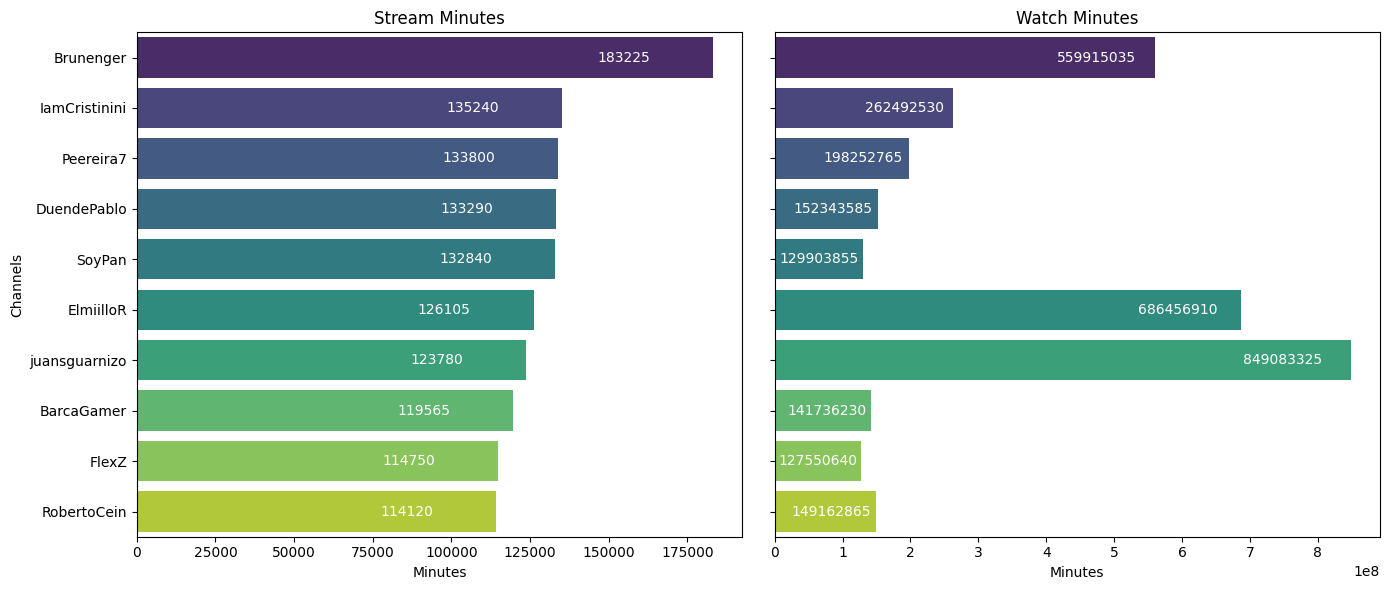

In [44]:
# Store in a variable the top 10 channels with the most stream time
top10 = df_spanish.nlargest(10, 'Stream time(minutes)')

# Create the figure to store both charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
plt.subplots_adjust(wspace=0.4)

# Create a bar chart for 'Stream time(minutes)', assigning hue to 'Channel'
ax1 = sns.barplot(x='Stream time(minutes)', y='Channel', data=top10, ax=axes[0], hue='Channel', palette='viridis', legend=False)
axes[0].set_title('Stream Minutes')
axes[0].set_xlabel('Minutes')
axes[0].set_ylabel('Channels')

for i, value in enumerate(top10['Stream time(minutes)']):
    ax1.text(value - 20000, i, str(value), va='center', ha='right', color='white')

# Create a bar chart for 'Watch time(Minutes)', assigning hue to 'Channel'
ax2 = sns.barplot(x='Watch time(Minutes)', y='Channel', data=top10, ax=axes[1], hue='Channel', palette='viridis', legend=False)
axes[1].set_title('Watch Minutes')
axes[1].set_xlabel('Minutes')
axes[1].set_ylabel('')

for i, value in enumerate(top10['Watch time(Minutes)']):
    ax2.text(value - 0.05 * value, i, str(value), va='center', ha='right', color='white')

# Show both charts
plt.tight_layout()
plt.show()

# CONCLUSIONS
- We can see that the vast majority of channels that made up the top 1000 Twitch streamers speak English. Channels in Spanish (the language on which I focused this analysis) are in fourth place among the spoken languages.

- Only a small part of the channels in Spanish have mature content (16.2%), while the rest of the channels consider that their content is not mature (83.8%). In fact, only 11 channels have mature content.

- In the case of the channels that are associated with Twitch, almost all of them have the platform's partner (98.5%), except for one channel (1.5%). This channel is Ampeterby7.

- Thanks to the scatter plots, we can see that there is NO strong correlation between the time the channels broadcast and the time users spend watching the content. <br>Where there IS a positive and strong linear correlation is between visits gained and followers gained. So we can say that the more views a channel gets, the more followers it will get. We can see the same thing between the followers gained and the total followers that the channel has, which is obvious at first glance but I don't want to go unnoticed.

- Finally, the channels that have the largest number of followers and those that broadcast the most minutes were identified, which provides a vision of the most influential channels on the platform within the Spanish-speaking community.

Ultimately, this analysis highlights the characteristics of Spanish-language streamers and the importance of broadcast time for the popularity and growth of these channels.